# BoomBikes Assignment

### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A **US bike-sharing provider BoomBikes** has recently suffered considerable **dips in their revenues due to the ongoing Corona pandemic.** The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, **BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.** They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

   
   **1. Which variables are significant in predicting the demand for shared bikes.**<br>
   **2. How well those variables describe the bike demands** <br>

#### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

-------------
## Business Goal

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market

## Steps
- <b>Step 1</b>: Data understanding
- <b>Step 2</b>: Data cleansing
- <b>Step 3</b>: EDA/Data Visualization
- <b>Step 4</b>: Model Builiding
- <b>Step 5</b>: Residual Analysis
- <b>Step 6</b>: Predictions and evaluation of model

In [1]:
# Importing relevant libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Import the librarires to Build the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Pre-processing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score #Evaluation metrics

#Importing Statsmodels for detailed summary of linear regression
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#To ensure that any numerical data does not display as scientific notation
pd.options.display.float_format = '{:,.2f}'.format

##  Data understanding

In [2]:
#To understand about data in quick way
def DataSummary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary


In [3]:
#Read the data
day=pd.read_csv('day.csv')

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [4]:
#Read Data Dictionary
with open ("readme.txt", "r") as myfile:
    data_dict=myfile.readlines()
    
data_dict[1:25] # Since we are good to understand what each column represent we will not spend any time cleaing up this.

['Dataset characteristics\n',
 '=========================================\t\n',
 'day.csv have the following fields:\n',
 '\t\n',
 '\t- instant: record index\n',
 '\t- dteday : date\n',
 '\t- season : season (1:spring, 2:summer, 3:fall, 4:winter)\n',
 '\t- yr : year (0: 2018, 1:2019)\n',
 '\t- mnth : month ( 1 to 12)\n',
 '\t- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)\n',
 '\t- weekday : day of the week\n',
 '\t- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\n',
 '\t+ weathersit : \n',
 '\t\t- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n',
 '\t\t- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n',
 '\t\t- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n',
 '\t\t- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n',
 '\t- temp : temperature in Celsius\n',
 '\t- atemp: feeling temperature in Celsius\n',
 '\t- hum: humidity\

In [5]:
#Printing Data Summary of Day
DataSummary(day)

Dataset Shape: (730, 16)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,instant,int64,0,730,1,2,3
1,dteday,object,0,730,01-01-2018,02-01-2018,03-01-2018
2,season,int64,0,4,1,1,1
3,yr,int64,0,2,0,0,0
4,mnth,int64,0,12,1,1,1
5,holiday,int64,0,2,0,0,0
6,weekday,int64,0,7,6,0,1
7,workingday,int64,0,2,0,0,1
8,weathersit,int64,0,3,2,2,1
9,temp,float64,0,498,14.11,14.90,8.05


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,"3,658.76","4,508.01"
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,"1,559.76","1,936.01"
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,"2,502.25","3,169.75"
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,"3,664.50","4,548.50"
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,"1,096.50","4,783.25","5,966.00"
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,"3,410.00","6,946.00","8,714.00"


### Observations:
- We have 730 obeservations and total 16 features available in date.
- The 'cnt' field does represent the sum of 'casual' and 'registered' users
- The data is from year 2018 and 2019 where can see avergare demand of Casual, Registered and Total for BoomBikes.
   1. **Avg. Casual Demand - 850 Bikes**
   2. **Avg. Registered Demand - 3659 Bikes**
   3. **Avg. Total Demand - 4508 Bikes**

## Step 2: Data cleansing

In [7]:
#Check missing values
day.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [8]:
#Convert 'dteday' to Datetime object
day['dteday']=pd.to_datetime(day['dteday'])

In [9]:
#Check the sanity of data
#There should not be Working day is Holiday is 1
day.loc[(day['holiday']==1) & (day['workingday']==1),['holiday','workingday']]

,holiday,workingday


#### Observations

-  Not observing any null values.
-  Observed only one object type field which is actually a date field.
-  The data looks good as there are no null values
-  We see that instant columns is just for record index we do not require it for further analysis.

In [10]:
#Drop Instant Column from data
day=day.drop('instant',axis=1)

## Step 3: EDA/Data Visualization

In [11]:
#Creating re-usable code for plotting
def plot_var(i,title1='Histogram',x1label=None,y1label='Frquency',title2='Boxplot',x2label=None,
             y2label='value',fig=(20,5),hue=None):
    if hue==None:
        plt.figure(figsize=fig)
        plt.subplot(1,2,1)
        fig_1=sns.histplot(data=day,x=i,hue=hue,kde=True)
        fig_1.set_title(title1,color='black',fontweight='bold')
        fig_1.set_xlabel(i, color='black',fontweight='bold')
        fig_1.set_ylabel(y1label ,color='black',fontweight='bold')

        plt.subplot(1,2,2)
        fig_2=sns.boxplot(data=day,y=i,x=hue)
        fig_2.set_title(title2,color='black',fontweight='bold')
        fig_2.set_xlabel(i, color='black',fontweight='bold')
        fig_2.set_ylabel(y2label ,color='black',fontweight='bold')
        plt.show()
    else:
        plt.figure(figsize=fig)
        plt.subplot(1,2,1)
        fig_1=sns.histplot(data=day,x=i,hue=hue)
        fig_1.set_title(title1,color='black',fontweight='bold')
        fig_1.set_xlabel(i, color='black',fontweight='bold')
        fig_1.set_ylabel(y1label ,color='black',fontweight='bold')

        plt.subplot(1,2,2)
        fig_2=sns.boxplot(data=day,y=i,x=hue)
        fig_2.set_title(title2,color='black',fontweight='bold')
        fig_2.set_xlabel(hue, color='black',fontweight='bold')
        fig_2.set_ylabel(y2label ,color='black',fontweight='bold')
        plt.show()
        
def plot_box_hue(col):
    plt.figure(figsize=(20,5))
    for i,v in enumerate(['casual','registered','cnt']):
        plt.subplot(1,3,i+1)
        sns.boxplot(data=day,x=col,y=v)
    plt.show()
    
def plot_bar_hue(col):
    plt.figure(figsize=(20,5))
    for i,v in enumerate(['casual','registered','cnt']):
        plt.subplot(1,3,i+1)
        sns.barplot(data=day,x=col,y=v)
    plt.show()

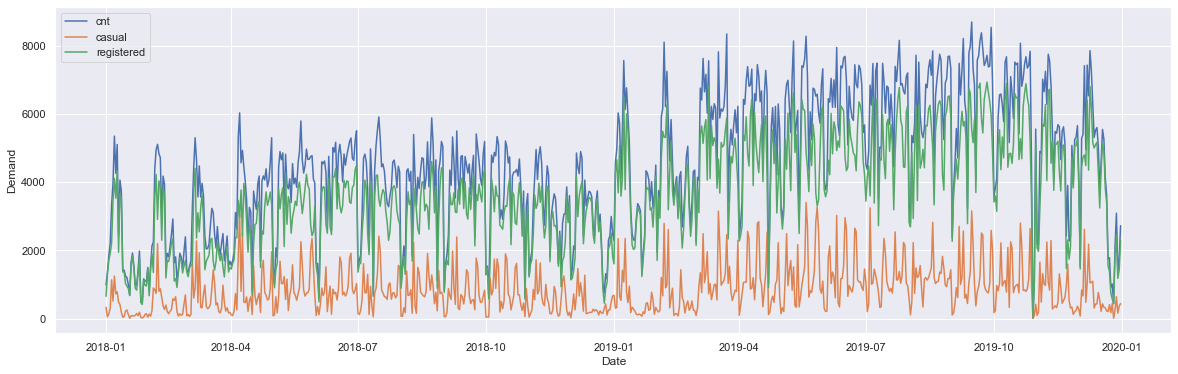

In [12]:
#Plotting Demand vs Time
plt.figure(figsize=(20,6))
sns.lineplot(data=day,x='dteday',y='cnt',label='cnt')
sns.lineplot(data=day,x='dteday',y='casual',label='casual')
sns.lineplot(data=day,x='dteday',y='registered',label='registered')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()

* Demand in Bikes are varying throughout the year 2018 and 2019. 

### Assumptions:
- Based Working Day, Season, Weather, Holiday and Month, people tend to decide whether they would like to opt out for bikes or not.
- Most of these variables are related to time only.

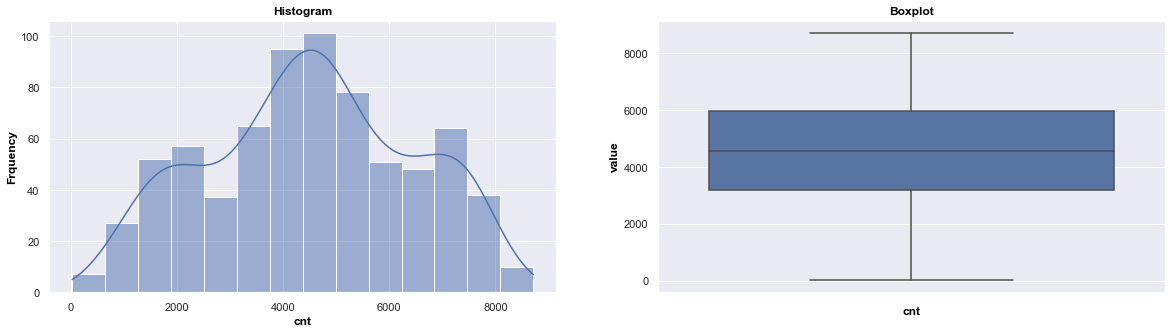

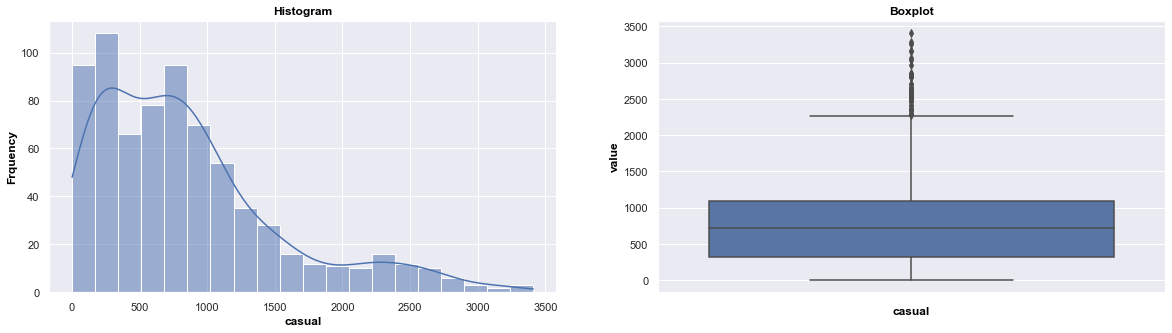

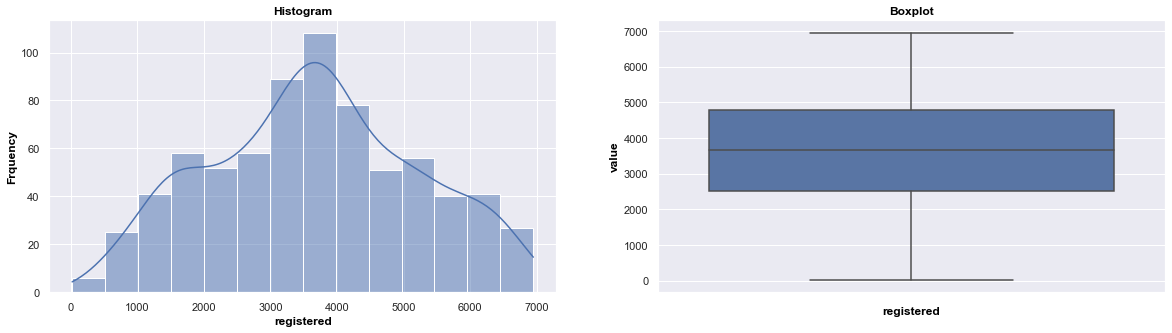

In [13]:
#Histogram of cnt - Univariate and Segmented uni-variate analysis
plot_var(i='cnt')
plot_var('casual')
plot_var('registered')

### Observation:
* We see that demand for Total and Registered are Normally Distributed. However, for Casual Demand, it is not the case.We will see later on to decide whether to scale it or not.

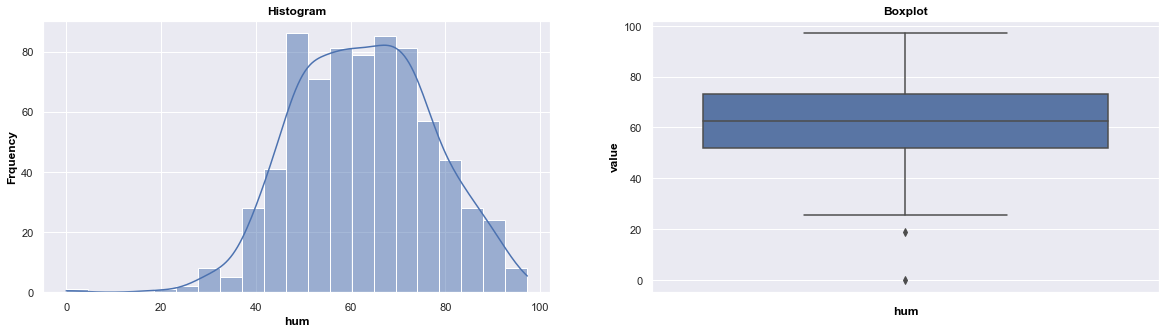

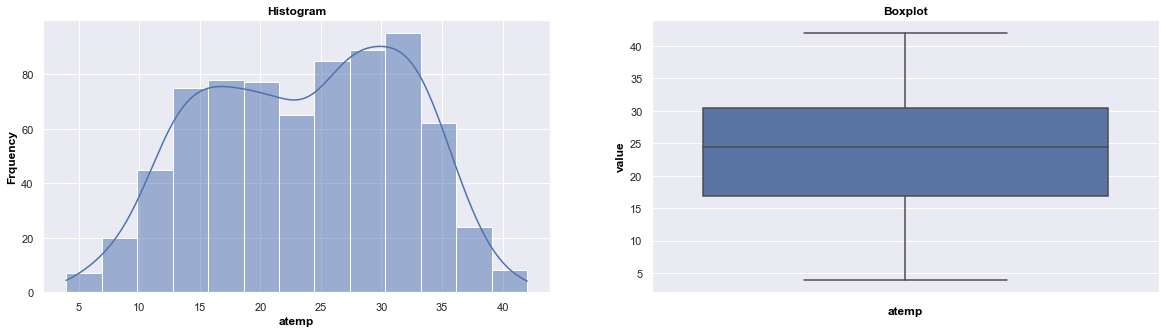

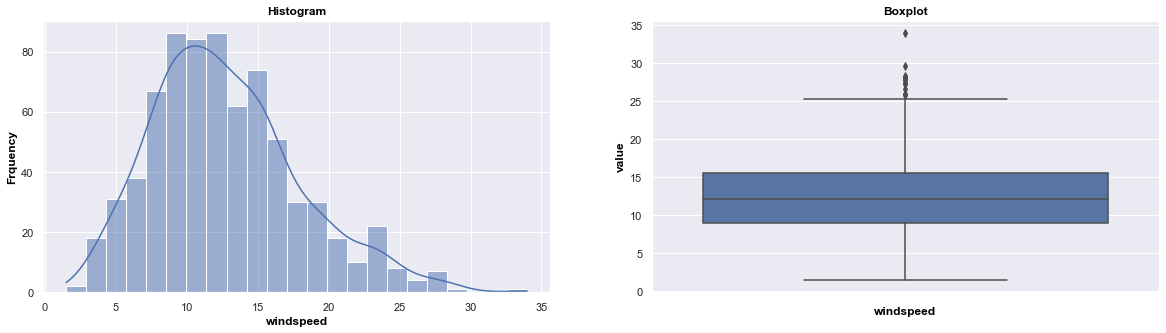

In [14]:
plot_var('hum')
plot_var('atemp')
plot_var('windspeed')

### Obeservation:
* Humidity is negatively skewed and windspeed is postively skewed.
* We see 0 and 20 as humidity for one obervation we should treate this outliers.
* Same is for Windspeed we see it is skewed and it has high windspeed as 35.

In [15]:
#Filling up 0 with Median Value to have our data normally distributed

day.loc[day.hum<=20,'hum']=day['hum'].median()

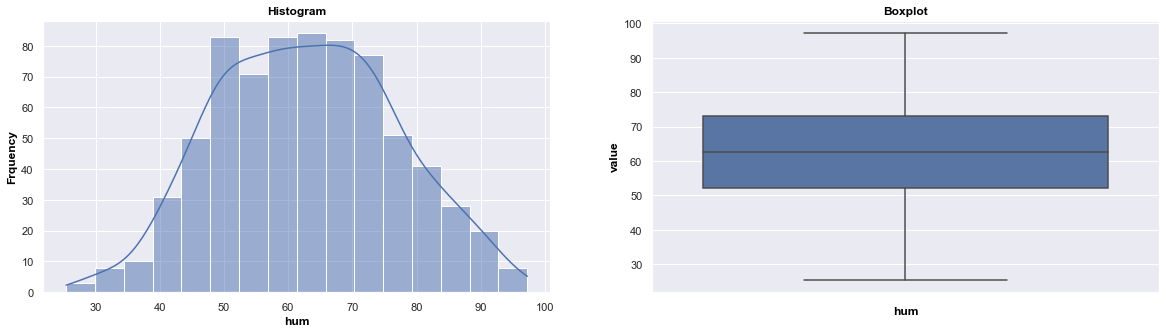

In [16]:
plot_var('hum')

In [17]:
day.loc[day.windspeed>=np.quantile(day.windspeed,.98),'windspeed']=day['windspeed'].median()

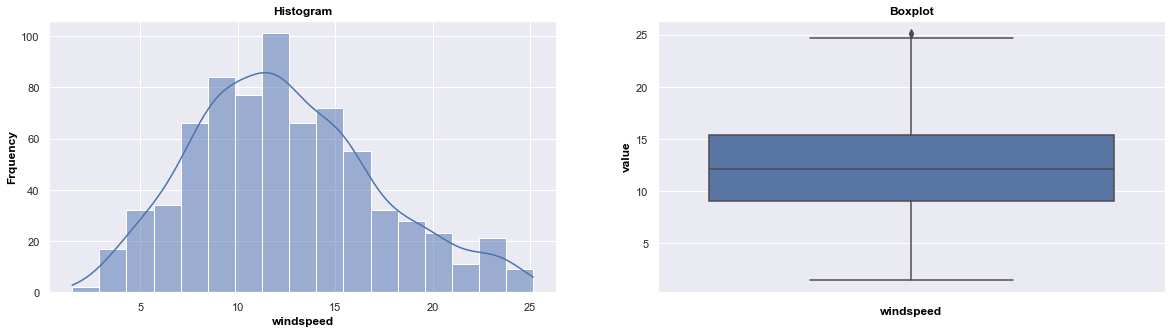

In [18]:
plot_var('windspeed')

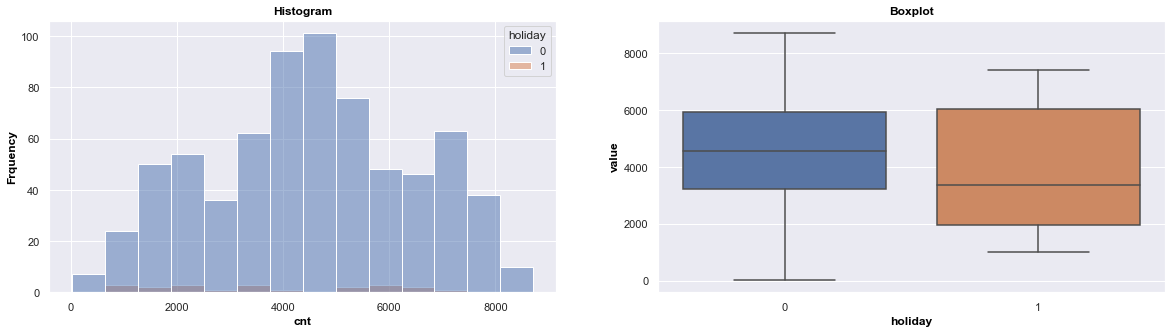

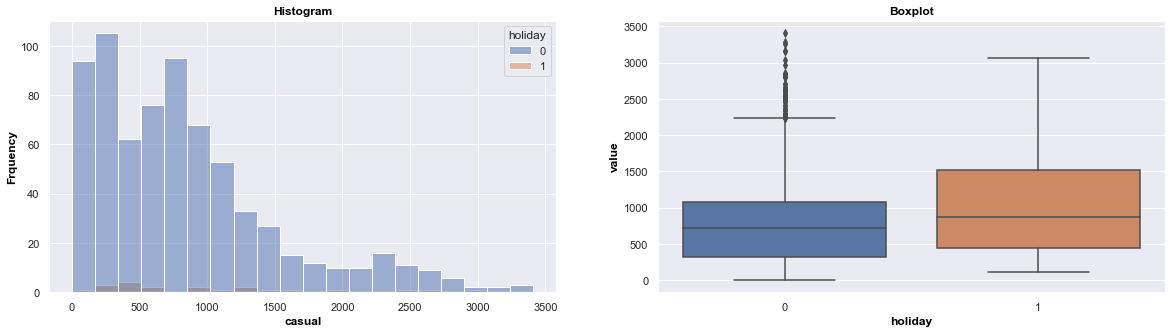

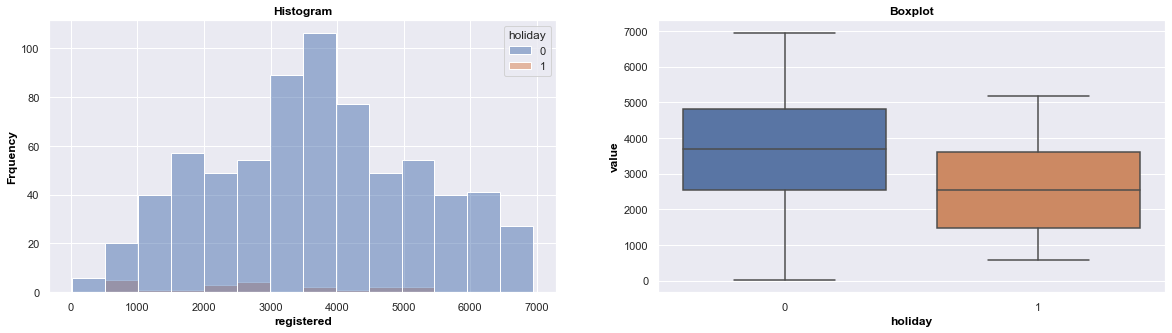

In [19]:
#W.r.t Holiday
plot_var('cnt',x2label='holiday',hue='holiday')
plot_var('casual',hue='holiday')
plot_var('registered',hue='holiday')

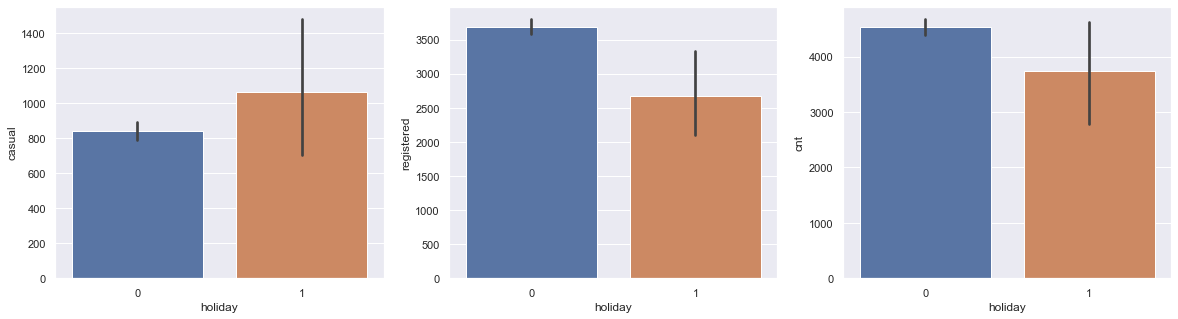

In [20]:
plot_bar_hue('holiday')

<AxesSubplot:xlabel='holiday', ylabel='count'>

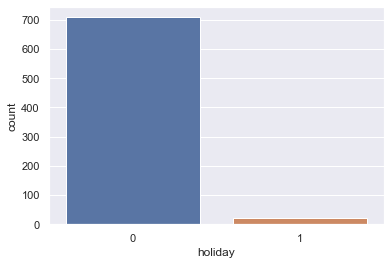

In [21]:
sns.countplot(data=day,x='holiday')

* We see that there are very few observation for which holiday is equal to '1'.

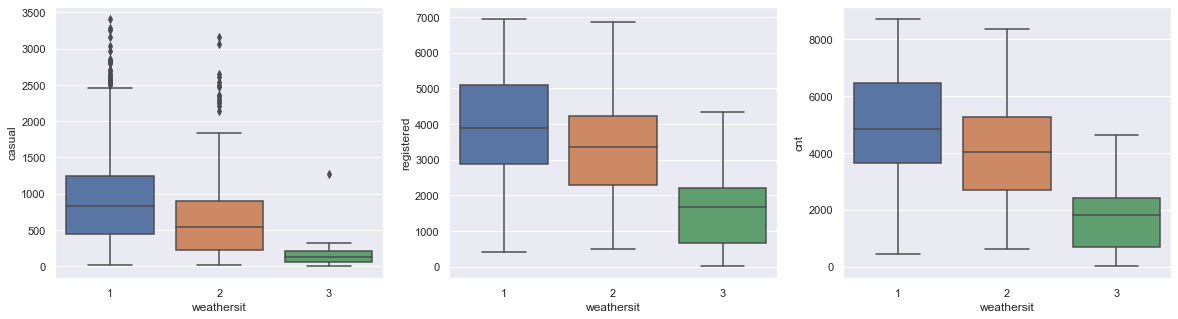

In [22]:
plot_box_hue('weathersit')

### Obeservation:
* Casual demand is high when there is holiday. One assumption could be that people want to go out on holiday but they are still not sure to register with BoomBikes hence they choose it as guest.
* The registered users are using the bikes even in the light rain/loght snow. Seems like this is the work related usage.
* Clear or mist days are clearly favorauble weather conditions to use the bikes.

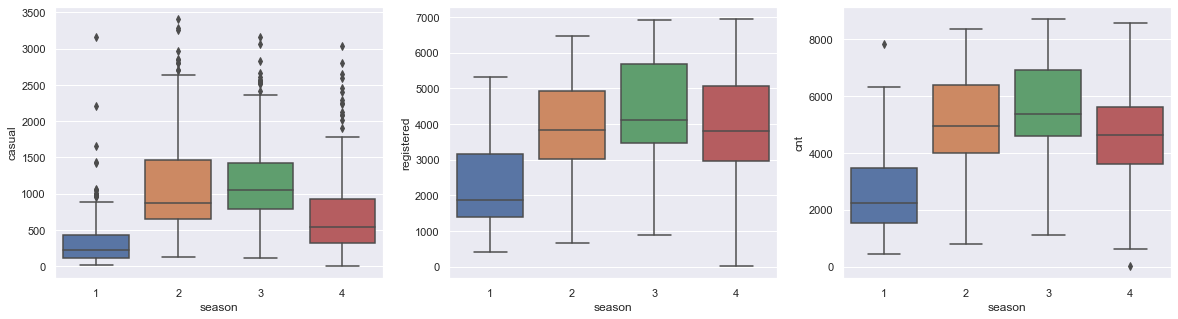

In [23]:
plot_box_hue('season')

* For Summer and fall Demand for Bikes are very high and least demand is observed in spring.

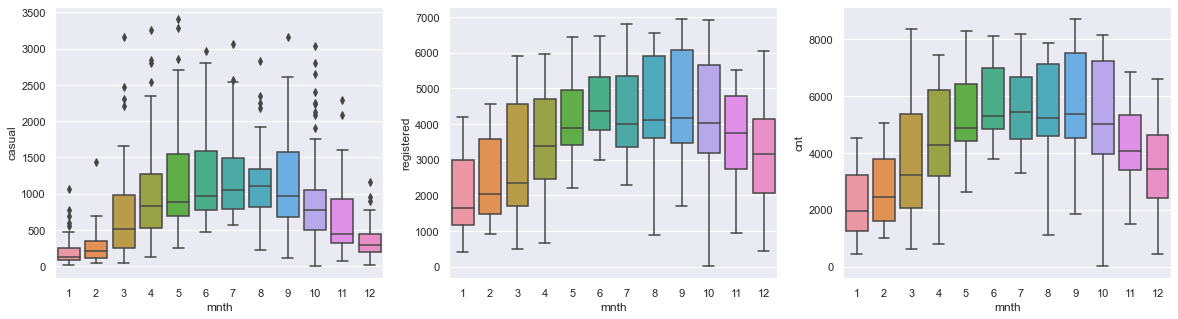

In [24]:
plot_box_hue('mnth')

* From March to October demand is quiet good. Remaining month does not shows good demand in compare to others.

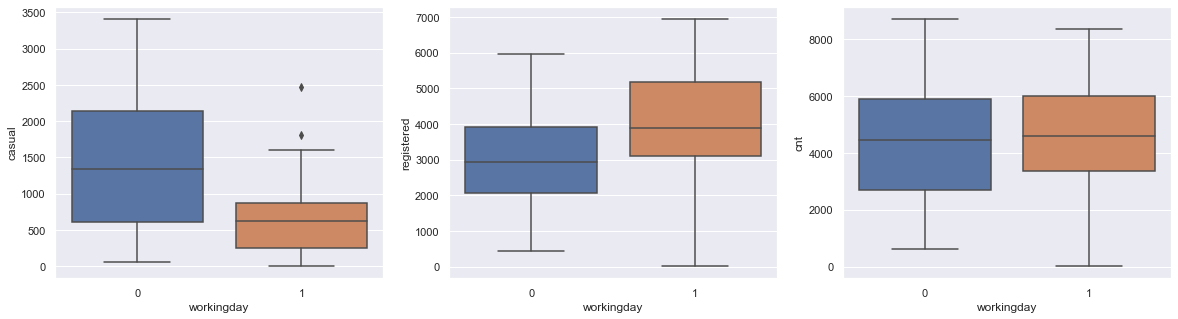

In [25]:
plot_box_hue('workingday')

<AxesSubplot:xlabel='workingday', ylabel='count'>

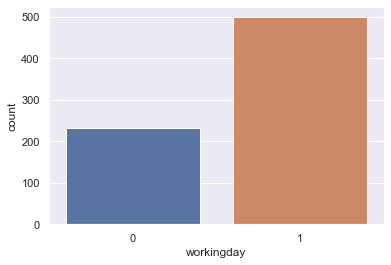

In [26]:
sns.countplot(data=day,x='workingday')

- As we can see the bikes are being used mostly on the workday compared to weekend. 

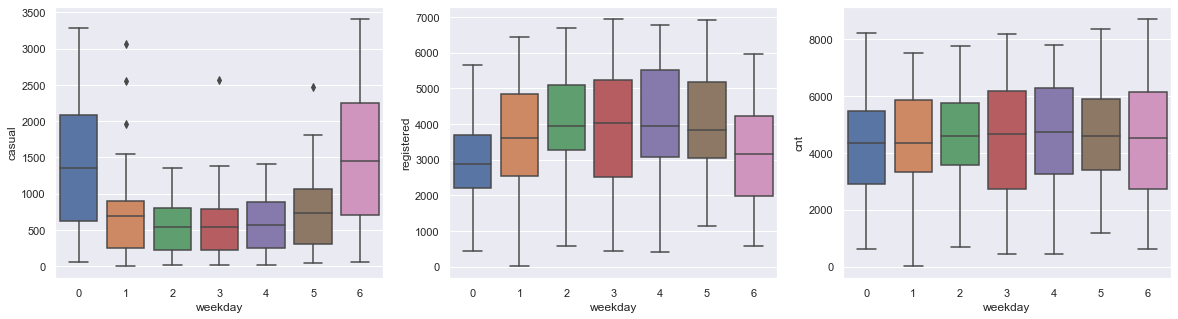

In [27]:
plot_box_hue('weekday')

* Demand for Casual are high for Weekday 0 and 6 where as opposite trend is seen for Demand in Registered Customers.
* Weekday 0 and 6 are Sunday and Saturday respectively.
- Across different seasons, the heavy rain/heavy snow fall days are particularly avoided.

In [28]:
day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2018-02-01,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,2018-03-01,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,2018-04-01,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,2018-05-01,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,1,12,0,4,1,2,10.42,11.33,65.29,23.46,247,1867,2114
726,2019-12-28,1,1,12,0,5,1,2,10.39,12.75,59.00,10.42,644,2451,3095
727,2019-12-29,1,1,12,0,6,0,2,10.39,12.12,75.29,8.33,159,1182,1341
728,2019-12-30,1,1,12,0,0,0,1,10.49,11.59,48.33,23.50,364,1432,1796


In [29]:
day.corr().style.background_gradient().set_precision(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.00,-0.00,0.83,-0.01,-0.00,0.01,0.02,0.33,0.34,0.20,-0.21,0.21,0.41,0.40
yr,-0.00,1.00,-0.00,0.01,-0.01,-0.00,-0.05,0.05,0.05,-0.13,-0.03,0.25,0.60,0.57
mnth,0.83,-0.00,1.00,0.02,0.01,-0.00,0.05,0.22,0.23,0.22,-0.19,0.12,0.29,0.28
holiday,-0.01,0.01,0.02,1.00,-0.10,-0.25,-0.03,-0.03,-0.03,-0.02,0.02,0.05,-0.11,-0.07
weekday,-0.00,-0.01,0.01,-0.10,1.00,0.04,0.03,-0.00,-0.01,-0.04,0.00,0.06,0.06,0.07
workingday,0.01,-0.00,-0.00,-0.25,0.04,1.00,0.06,0.05,0.05,0.02,-0.01,-0.52,0.31,0.06
weathersit,0.02,-0.05,0.05,-0.03,0.03,0.06,1.00,-0.12,-0.12,0.62,0.07,-0.25,-0.26,-0.30
temp,0.33,0.05,0.22,-0.03,-0.00,0.05,-0.12,1.00,0.99,0.13,-0.13,0.54,0.54,0.63
atemp,0.34,0.05,0.23,-0.03,-0.01,0.05,-0.12,0.99,1.00,0.14,-0.16,0.54,0.54,0.63
hum,0.20,-0.13,0.22,-0.02,-0.04,0.02,0.62,0.13,0.14,1.00,-0.19,-0.09,-0.11,-0.12


#### We observe that season and months are highly correalted with each other. Same is applicable for temp and atemp!  `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`.This both are also highly correalted with `cnt`,so we can drop these both.

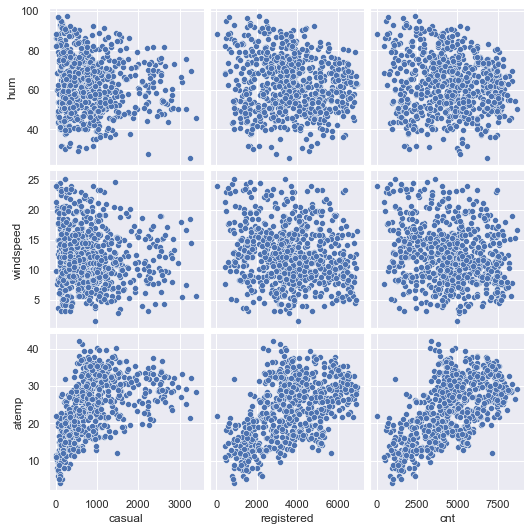

In [30]:
pair_list=['casual','registered','cnt','hum','windspeed','atemp']
sns.pairplot(day,x_vars=['casual','registered','cnt'],y_vars=['hum','windspeed','atemp'])

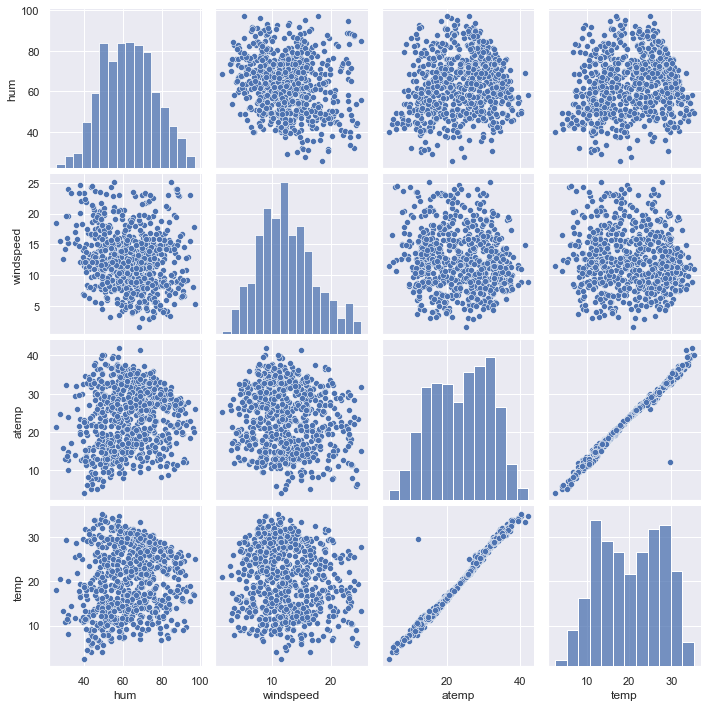

In [31]:
sns.pairplot(day,x_vars=['hum','windspeed','atemp','temp'],y_vars=['hum','windspeed','atemp','temp'])

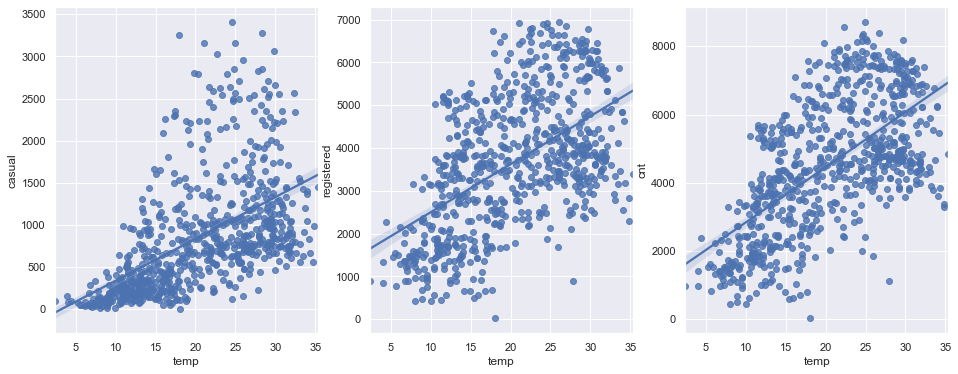

In [32]:
plt.figure(figsize=(16,6))
for i,v in enumerate(['casual','registered','cnt']):
    plt.subplot(1,3,i+1)
    sns.regplot(data=day,x='temp',y=v)
plt.show()

* Temperature is having positive linear relationship with demands.

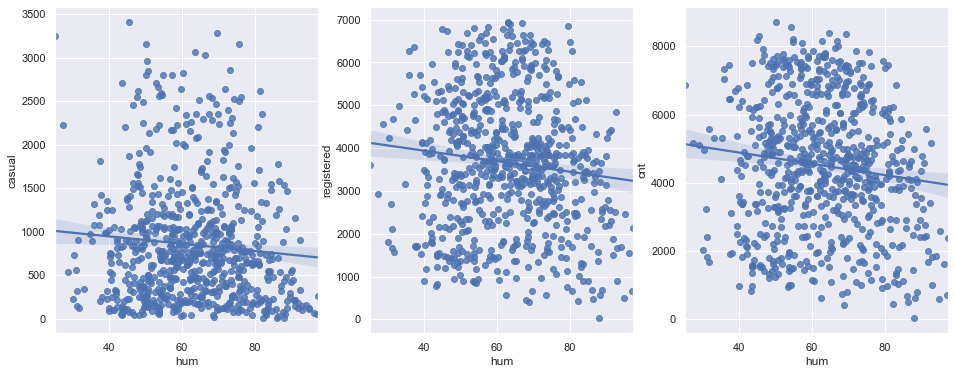

In [33]:
plt.figure(figsize=(16,6))
for i,v in enumerate(['casual','registered','cnt']):
    plt.subplot(1,3,i+1)
    sns.regplot(data=day,x='hum',y=v)
plt.show()

* for Humidity, data is very scattered all over the graph.

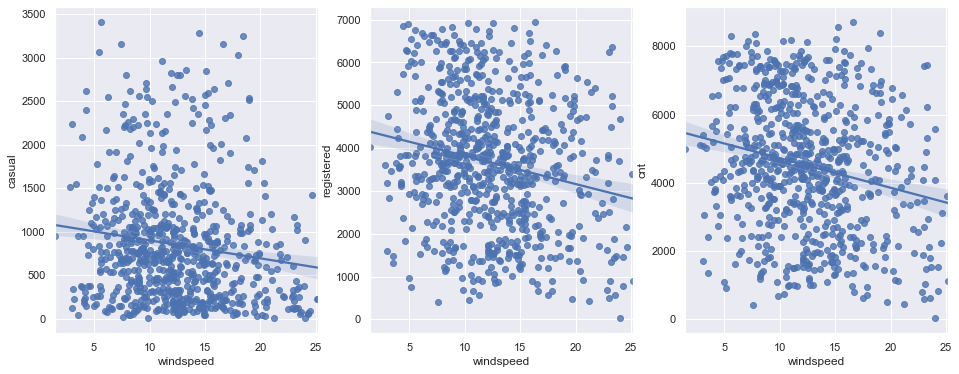

In [34]:
plt.figure(figsize=(16,6))
for i,v in enumerate(['casual','registered','cnt']):
    plt.subplot(1,3,i+1)
    sns.regplot(data=day,x='windspeed',y=v)
plt.show()

**Temperature:**
Demand for bikes is positively correlated to `temp`.
We can see that `cnt` is linearly increasing with `temp` indicating linear relation.

**Humidity:**
`Hum` values are more scattered around.
Although we can see `cnt` decreasing with increase in humidity.

**Windspeed:**
`Windspeed` values are more scattered around.
Although we can see `cnt` decreasing with increase in windspeed.

<AxesSubplot:>

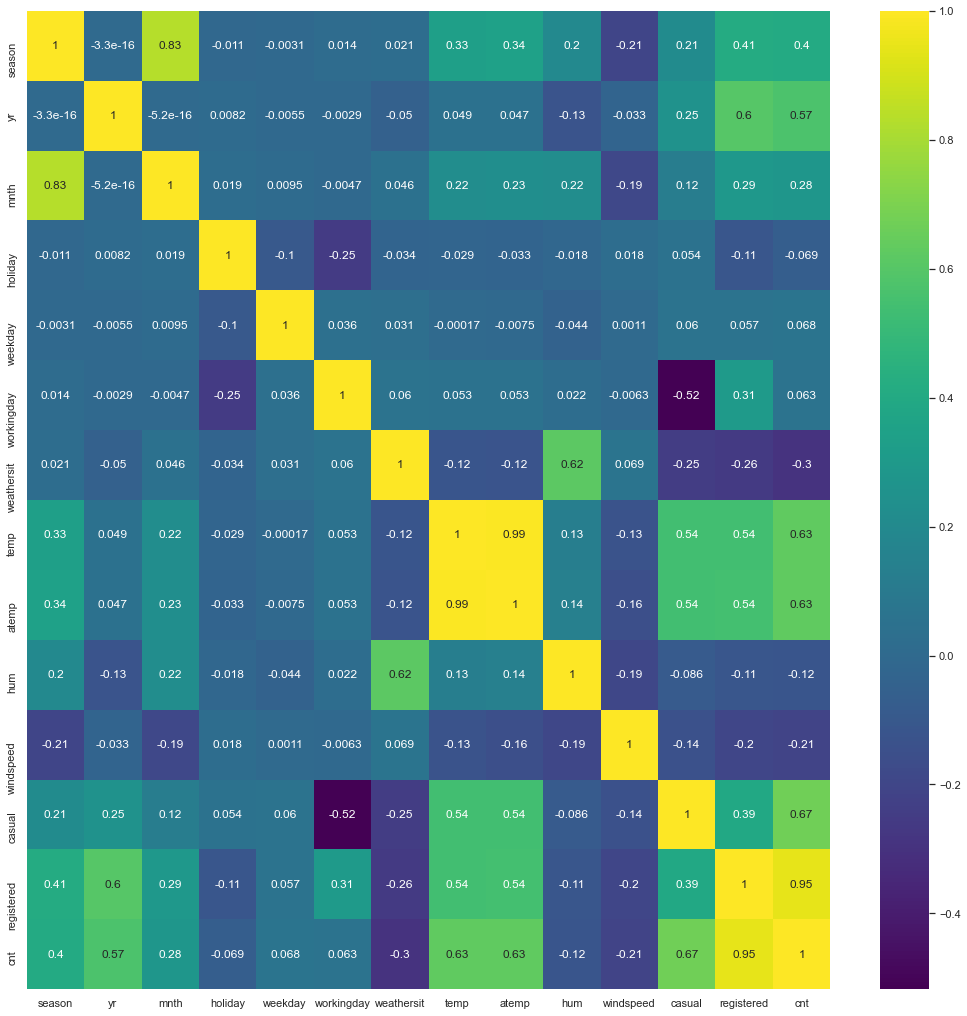

In [35]:
plt.figure(figsize=(18,18))
sns.heatmap(day.corr(),annot=True,cmap='viridis')

* Wind Speed has negative linear relationship with Demand. However, data is very scattered all over the graph.

- The season and weathersit fields are inverserly proportional and not clear yet if could be helpful create any derived column out of it
- On working day more registered users are using the bike and on the weekends/holidays the number of casual users are increasin. There is an inverse relation.
- At this moment it is hard to conclude the multicollinearity between the casual, registered and CNT users, hence keeping those columns for now.
-  Keeping the temp, atemp variables are as well to check those in the MLR process.
- The casual and regsitered users are another set of target variables as we saw that in the above steps that summing up these two parameters gives our target variable.
- The bar plot "Registered/casual users usage on weekdays" shows very interesting relation with the working day parameter.

## Step 4: Model Building

### We'll first drop unneccessary columns then convert categorical variables to their actual names. After that, start build model using statsmodels.

In [36]:
####Convert the columns to meaningful with reference to the understanding from Data Dict.

day.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

day.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

day.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

day.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [37]:
#We do not need 'dteday'and 'temp'
day=day.drop(['dteday','temp'],axis=1)

In [38]:
#Since 'cnt' column is further divided with Casual and Registered type of demands these could be highly correalted features.
#we do not require those for analysis
X=day.drop(['cnt','registered','casual'],axis=1)
y=day['cnt']

In [39]:
def GetDummies(X,drop=True):
    num_vars=[i for i in X.columns if X[i].nunique()>2 and X[i].nunique()<25]
    dummy=pd.get_dummies(X[num_vars],columns=num_vars,drop_first=drop)
    X=pd.concat([X,dummy],axis=1)
    X=X.drop(num_vars,axis=1)
    return X

X=GetDummies(X)

X.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,18.18,80.58,10.75,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.69,69.61,16.65,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47,43.73,16.64,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,10.61,59.04,10.74,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,11.46,43.70,12.52,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
5,0,0,1,11.66,51.83,6.00,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,0,0,1,10.44,49.87,11.30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,8.11,53.58,17.88,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,5.81,43.42,24.25,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,0,0,1,7.54,48.29,14.96,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


<AxesSubplot:>

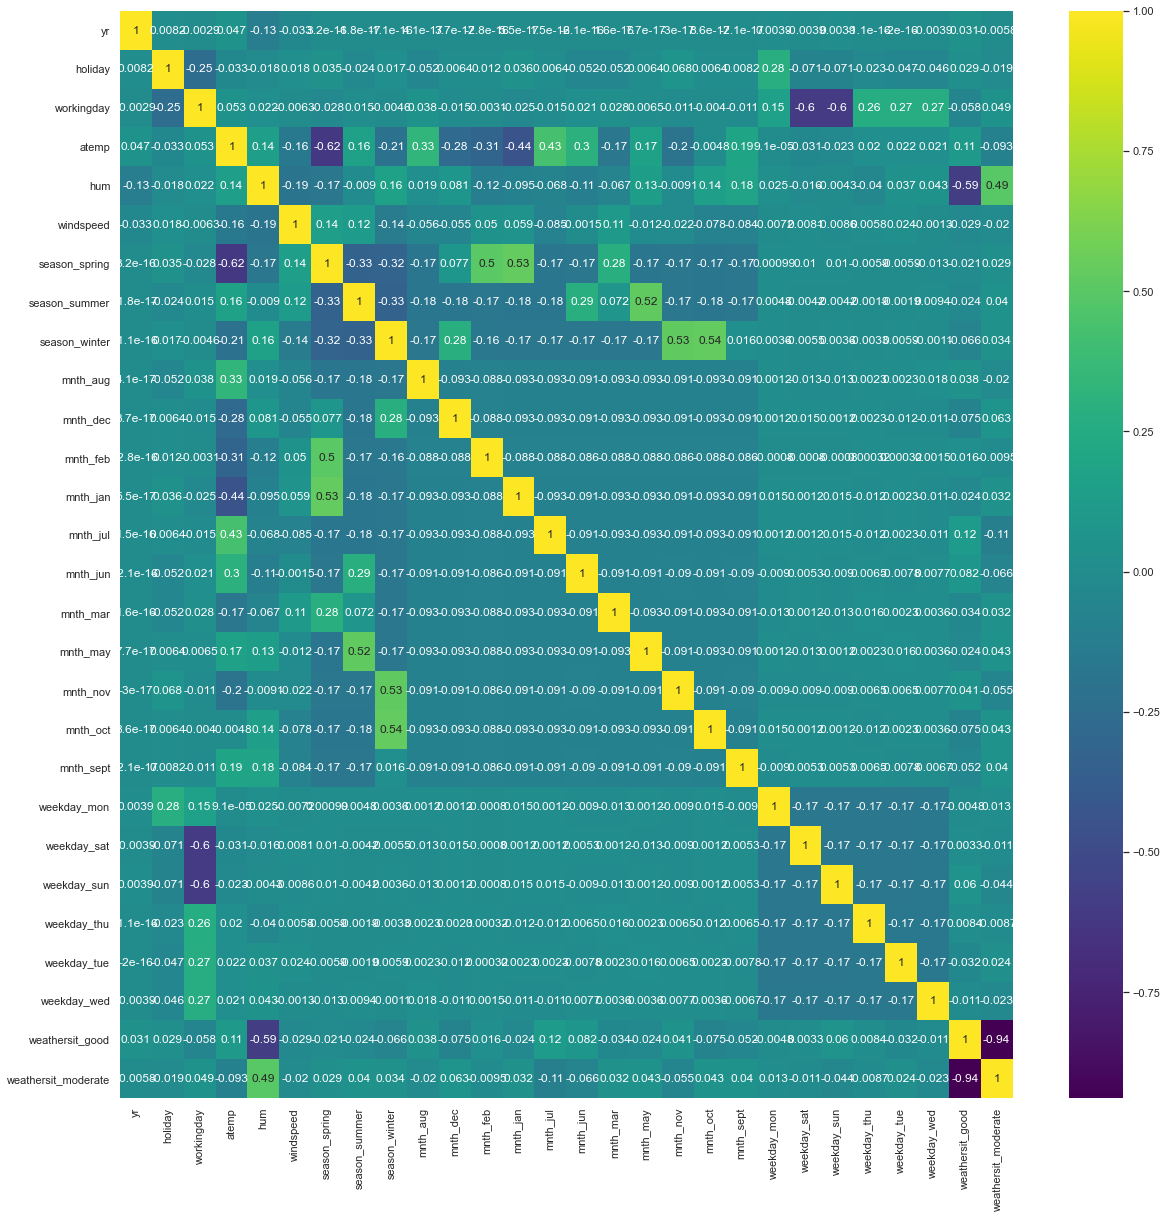

In [40]:
#Checking correlation of X
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),cmap='viridis',annot=True)

We see that there are few columns which seems to be correlated. We will start buliding model by adding useful variables.

In [41]:
#Since we have very small dataset we will be using 80% of the data for Training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [42]:
#Applying scaling to X_train excluding dummy variables
scaler=StandardScaler()
#Selecting variables to scale
scaler_vars=[i for i in X_train.columns if X_train[i].max()>1]

X_train[scaler_vars]=scaler.fit_transform(X_train[scaler_vars])

In [43]:
#Inspect independent variables
X_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,...,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00,584.00
mean,0.51,0.03,0.67,-0.00,0.00,0.00,0.25,0.25,0.25,0.09,...,0.09,0.08,0.15,0.15,0.15,0.14,0.13,0.15,0.63,0.34
std,0.50,0.16,0.47,1.00,1.00,1.00,0.43,0.43,0.43,0.29,...,0.29,0.27,0.36,0.36,0.36,0.34,0.34,0.36,0.48,0.47
min,0.00,0.00,0.00,-2.43,-2.62,-2.05,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,-0.86,-0.81,-0.72,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.08,0.02,-0.09,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,1.00,0.00,1.00,0.84,0.72,0.62,1.00,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,2.30,2.48,2.72,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [44]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(584, 28)
(146, 28)


### Model 1: Using RFE- Automated feature elimination

In [45]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [46]:
#Chekcing Ranking of reach Predictor 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 9),
 ('windspeed', False, 8),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 10),
 ('mnth_jun', True, 1),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [47]:
#Printing useful predictors
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_nov', 'mnth_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [48]:
#Un-important columns as per RFE fit
X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'season_summer', 'mnth_aug', 'mnth_jul', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Using manual approach to remove features ( Extention of Model 1 only)

In [50]:
#Defining function to print top 5 VIF score out of X_train
# Calculate the VIFs for the new model
def VIF(X_col):
    vif = pd.DataFrame()
    vif['Features'] = X_col.columns
    vif['VIF'] = [round(variance_inflation_factor(X_col.values, i),2) for i in range(X_col.shape[1])]
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif.head(5)

In [51]:
#Model-1: All columns selected by RFE
X_train_sm1= sm.add_constant(X_train_rfe)
lm_sm1 = sm.OLS(y_train,X_train_sm1).fit()   # Running the linear model

#Summary of linear model
print(lm_sm1.summary())

VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     195.1
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          1.31e-212
Time:                        16:53:15   Log-Likelihood:                -4724.3
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     568   BIC:                             9551.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 801.6870    

,Features,VIF
13,weathersit_good,5.63
4,season_spring,4.72
2,workingday,4.62
14,weathersit_moderate,3.55
3,atemp,2.96


In [52]:
#Model-2: by dropping 'holiday' due to its high p-value
X_train_rfe.drop('holiday',axis=1,inplace=True)
X_train_sm2= sm.add_constant(X_train_rfe)
lm_sm2 = sm.OLS(y_train,X_train_sm2).fit()   # Running the linear model

#Summary of linear model
print(lm_sm2.summary())

VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          4.32e-213
Time:                        16:53:15   Log-Likelihood:                -4726.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     569   BIC:                             9547.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 754.9251    

,Features,VIF
12,weathersit_good,5.33
3,season_spring,4.71
1,workingday,4.13
13,weathersit_moderate,3.40
2,atemp,2.96


In [53]:
#Model-3: by dropping 'mnth_feb' due to its high p-value
X_train_rfe.drop('mnth_feb',axis=1,inplace=True)
X_train_sm3= sm.add_constant(X_train_rfe)
lm_sm3 = sm.OLS(y_train,X_train_sm3).fit()   # Running the linear model

#Summary of linear model
print(lm_sm3.summary())

VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          3.26e-213
Time:                        16:53:15   Log-Likelihood:                -4728.5
No. Observations:                 584   AIC:                             9485.
Df Residuals:                     570   BIC:                             9546.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 753.3333    

,Features,VIF
11,weathersit_good,5.29
1,workingday,4.13
3,season_spring,3.60
12,weathersit_moderate,3.37
2,atemp,2.85


In [54]:
#Model-4: by dropping 'mnth_jun' due to its high p-value
X_train_rfe.drop('mnth_jun',axis=1,inplace=True)
X_train_sm4= sm.add_constant(X_train_rfe)
lm_sm4 = sm.OLS(y_train,X_train_sm4).fit()   # Running the linear model

#Summary of linear model
print(lm_sm4.summary())

VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          1.73e-213
Time:                        16:53:15   Log-Likelihood:                -4730.7
No. Observations:                 584   AIC:                             9487.
Df Residuals:                     571   BIC:                             9544.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 782.9061    

,Features,VIF
10,weathersit_good,5.13
1,workingday,4.13
3,season_spring,3.58
11,weathersit_moderate,3.32
2,atemp,2.78


In [55]:
#Model-5: by dropping 'weathersit_good' due to its high p-value
X_train_rfe.drop('weathersit_good',axis=1,inplace=True)
X_train_sm5= sm.add_constant(X_train_rfe)
lm_sm5 = sm.OLS(y_train,X_train_sm5).fit()   # Running the linear model

#Summary of linear model
print(lm_sm5.summary())

VIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          3.83e-182
Time:                        16:53:15   Log-Likelihood:                -4807.5
No. Observations:                 584   AIC:                             9639.
Df Residuals:                     572   BIC:                             9691.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3434.4879    

,Features,VIF
3,season_spring,2.98
1,workingday,2.59
4,season_winter,2.49
2,atemp,2.42
0,yr,1.88


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Based on Model Building our model 5 : lm_sm5 tends to yield good r2 and adj. r2 score wit low p value and low VIF Score.

## Step 5: Residual Analysis

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [56]:
#Scaling X_test data and filtering datagrame with the columns needed for lm_sm9
X_test[scaler_vars]=scaler.transform(X_test[scaler_vars])

In [57]:
#Processing Test Data for prediction with model 5
X_test_new=X_test[X_train_sm5.drop('const',axis=1).columns]
X_test_new.head()

,yr,workingday,atemp,season_spring,season_winter,mnth_dec,mnth_jan,mnth_nov,mnth_sept,weekday_sat,weathersit_moderate
184,0,0,1.21,0,0,0,0,0,0,0,1
535,1,1,1.56,0,0,0,0,0,0,0,0
299,0,1,-0.08,0,1,0,0,0,0,0,1
221,0,1,1.33,0,0,0,0,0,0,0,0
152,0,1,1.08,0,0,0,0,0,0,0,0


In [58]:
#Making prediction on X_test_new data
y_pred=lm_sm5.predict(sm.add_constant(X_test_new))

In [59]:
#Making prediction on Y_train data as well
y_train_pred=lm_sm5.predict(X_train_sm5)

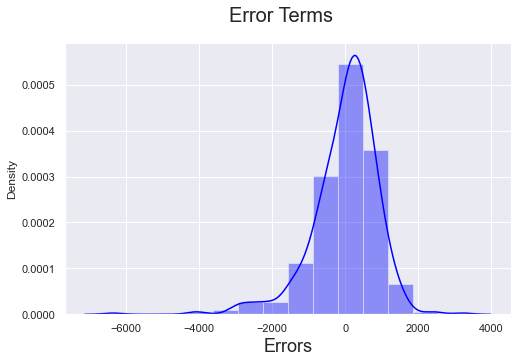

In [60]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(8,5))
res = y_train - y_train_pred
sns.distplot(res,bins=14,color="Blue")
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

Residuals are following the normally distributed with a mean 0. This shows our Linear Regression one of the assumption is intact.

Text(0.5, 1.0, 'Residual line plot')

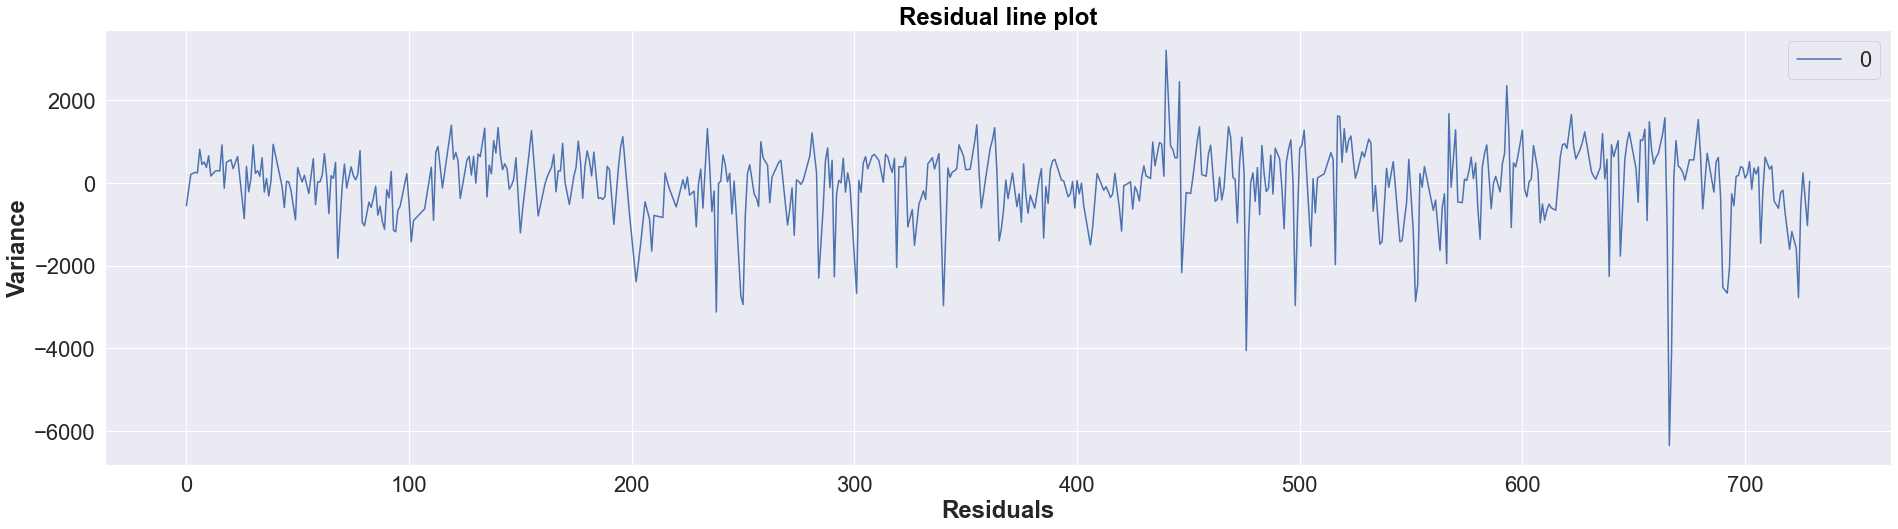

In [61]:
plt.figure(figsize=(32,8))
sns.set(font_scale=2)
sns.lineplot(data=pd.DataFrame(res))
plt.xlabel('Residuals', fontweight='bold')
plt.ylabel('Variance', fontweight='bold')
plt.title('Residual line plot', color='black', fontweight='bold')

Text(0.5, 1.0, 'Independent variables vs Residual')

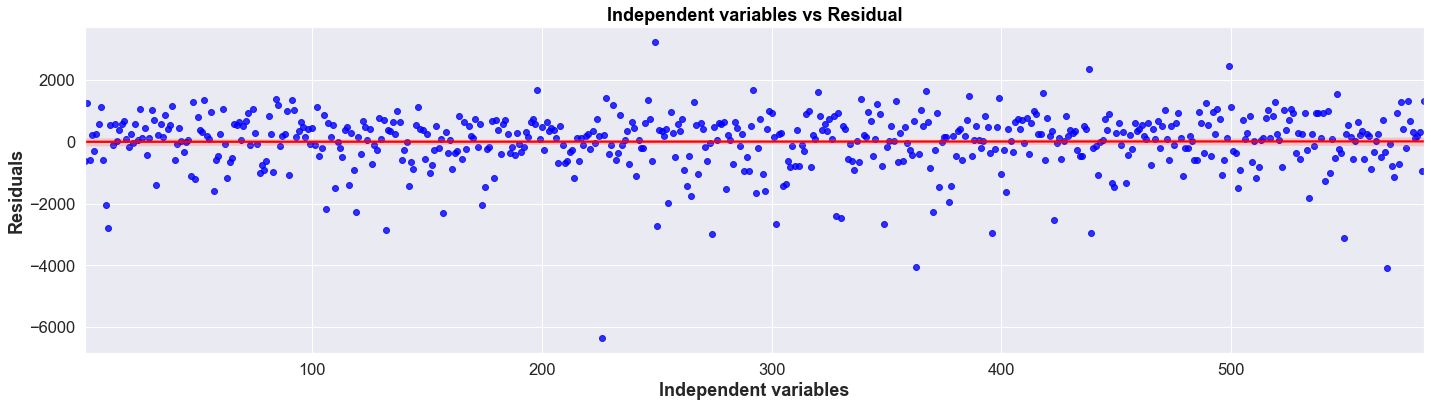

In [62]:
plt.figure(figsize=(24,6))
sns.set(font_scale=1.5)
record_count = [i for i in range(1, X_train_sm5.shape[0]+1, 1)]
sns.regplot(x=record_count, y=res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Independent variables', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Independent variables vs Residual', color='black', fontweight='bold')

Text(0.5, 1.0, 'Residuals vs Predicted values')

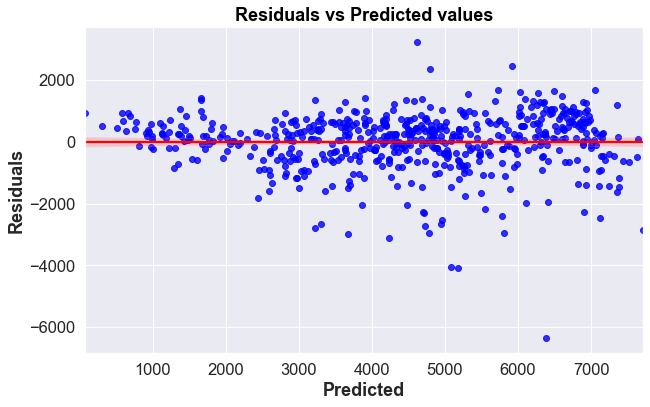

In [63]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.regplot(x=y_train_pred, y=res,color="g", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residuals vs Predicted values', color='black', fontweight='bold')

Text(0.5, 1.0, 'Residuals vs Predicted values')

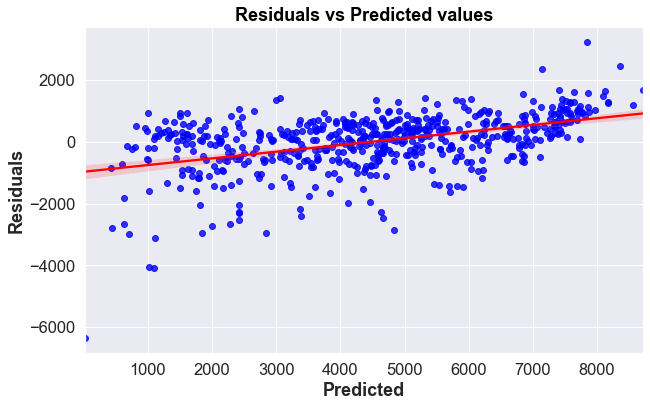

In [64]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.regplot(x=y_train, y=res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residuals vs Predicted values', color='black', fontweight='bold')

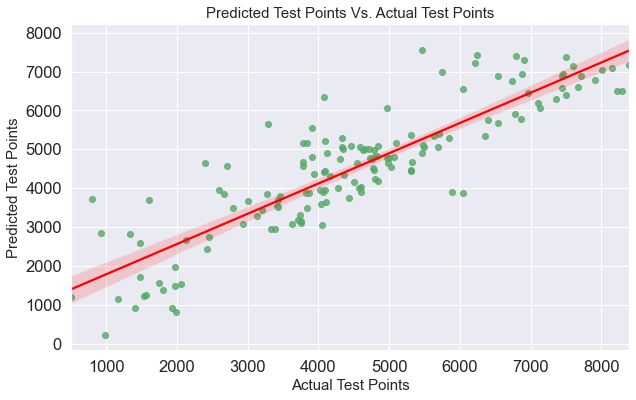

In [65]:
#Plotting 'regplot': y_test and y_test_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred,color="g",line_kws={"color": "red"})
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 15})# Plot heading 
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})                         # X-label
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})                      # Y-label                     
plt.show()

## Step 6: Predictions and evaluation of model

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7670688185622037

In [67]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7839129386477711

Text(0, 0.5, 'Demand')

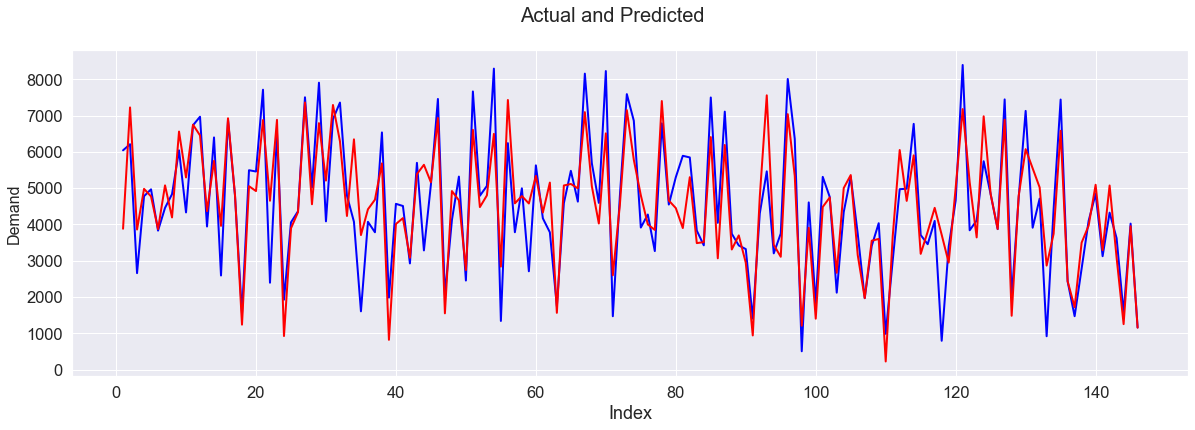

In [68]:
#Actual vs Predicted
c = [i for i in range(1,X_test.shape[0]+1,1)]
fig = plt.figure(figsize=(20,6))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Demand', fontsize=16) 

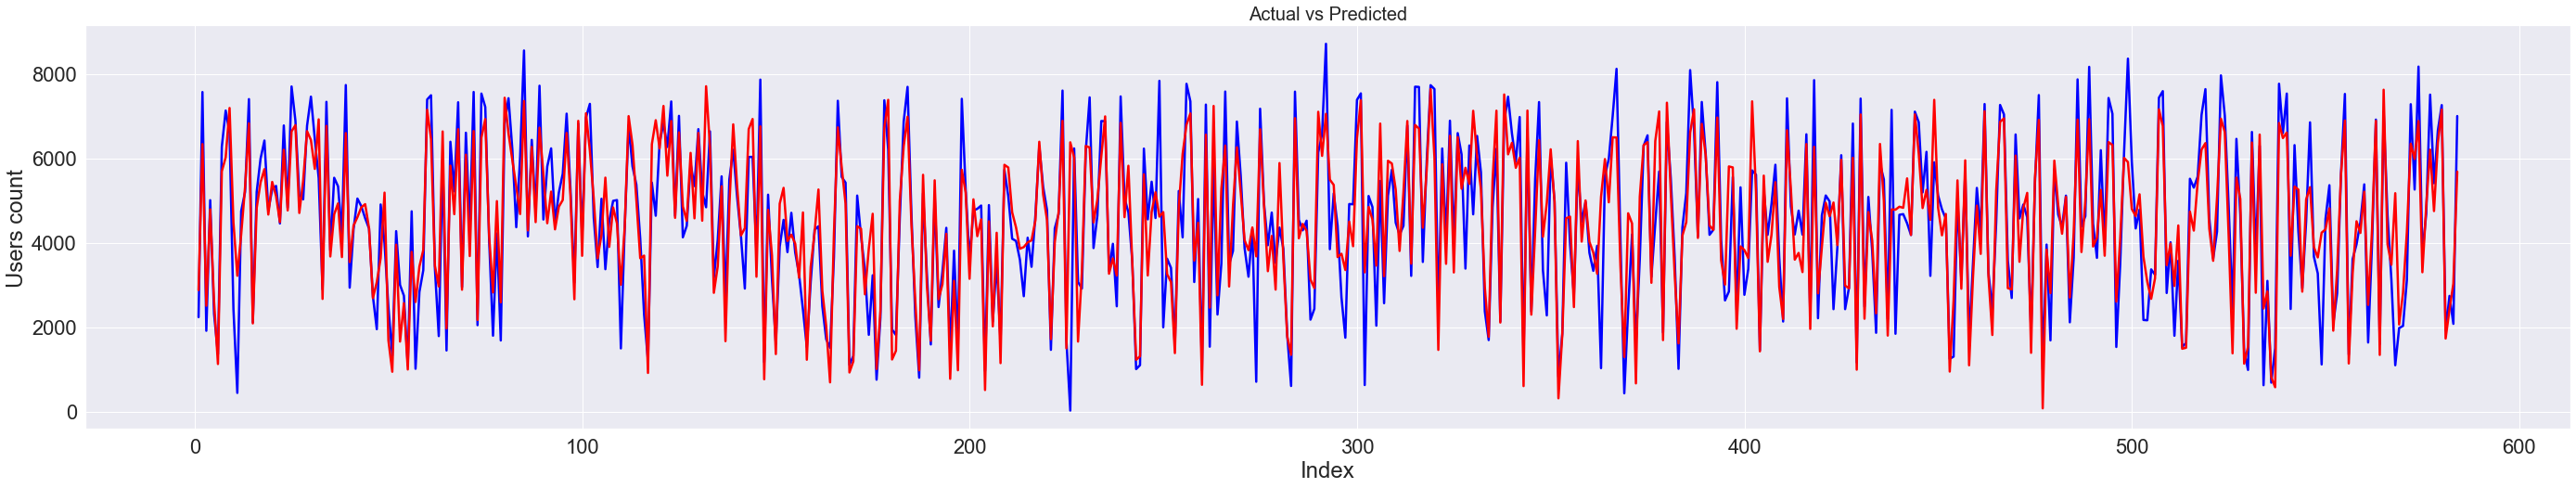

In [69]:
#Actual vs Predicted
record_count = [i for i in range(1, y_train_pred.size+1, 1)]
plt.figure(figsize=(48, 8))
sns.set(font_scale=2)
sns.lineplot(record_count,y_train, color="blue", linewidth=2.5, linestyle="-")
sns.lineplot(record_count,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
plt.title('Actual vs Predicted', fontsize=20)  
plt.xlabel('Index')                   
plt.ylabel('Users count')
plt.show()

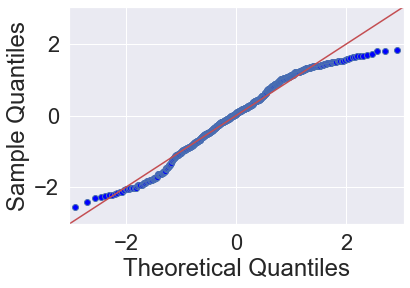

In [70]:
sm.qqplot(y_train_pred,fit=True,line='45');

In [71]:
param = pd.DataFrame(lm_sm5.params)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param.style.background_gradient(cmap='Greens')

,Coefficient value
const,3434.487881
yr,2060.263915
atemp,819.973514
season_winter,587.170601
weekday_sat,508.299180
mnth_sept,461.197501
workingday,452.440243
mnth_jan,-304.345511
mnth_dec,-443.584182
mnth_nov,-520.768439



We can see that the equation of our best fitted line is:

***cnt*** = **3434.48** + **2060.26** X ***(yr)*** + **819.97** X ***(atemp)*** + **587.17** X ***(season_winter)*** + **508.29** X ***(weekday_sat)***+ **461.19** X ***(mnth_sept)*** + **452.44** X ***(workingday)*** - **304.34** X ***(mnth_jan)***- **443.58** X ***(mnth_dec)***  -**520.76** X ***(mnth_nov)*** -**546.58** X ***(weathersit_moderate)*** -**1016.27** X ***(season_spring)***



#### All the positive coefficients indicate that an increase in these values will lead to an increase in the value of `cnt`

#### All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of `cnt`.

### Analysing the above model, BoomBikes comapany should focus on the following features:
- Company should focus with respect to Temperature.
- Company should focus on expanding business during Spring Season.
- Company should focus on expanding business during the month of September.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- Company is doing good during the working days & weekends and needs to take necessary promotions during holidays.

-----------------------------